## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
url='https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct'
data_df=pd.read_csv(url)


In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000','')                                      # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
data_df['date']=data_df['date'].astype(int)
data_array = data_df.iloc[:, 1:].to_numpy()                                           # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean =  np.mean(data_array,axis=0)                    # this should be an array, each entry should be mean of a column
sd = np.std(data_array,axis=0)                                # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_array_norm[:,1]                                                                                                           # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,axis=1)                                                                                                     # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred-y_true)**2)                  # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a)+b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  g=(yp-y_true)[:, np.newaxis]

  da = np.mean(g*x,axis=0)            # write code to calculate derivative of loss with respect to a
  db = np.mean(yp-y_true)           # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n,)                                       # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    yp=y(x,a,b)

    l_mse = loss(yp,y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)
    da,db=gradient(x,a,b,y_true)
    a=a-da*learning_rate
    b=b-db*learning_rate

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 200              # tweak this!!!
learn_rate = 0.01          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_array_norm,labels,learn_rate,epochs)

Epoch  1  Completed! loss =  1.0
Epoch  2  Completed! loss =  0.9501472728257109
Epoch  3  Completed! loss =  0.9047177256205092
Epoch  4  Completed! loss =  0.8632855362844438
Epoch  5  Completed! loss =  0.8254672408725047
Epoch  6  Completed! loss =  0.7909174621675475
Epoch  7  Completed! loss =  0.7593250714804518
Epoch  8  Completed! loss =  0.7304097396296686
Epoch  9  Completed! loss =  0.7039188375355311
Epoch  10  Completed! loss =  0.6796246508913738
Epoch  11  Completed! loss =  0.657321876990205
Epoch  12  Completed! loss =  0.6368253750340871
Epoch  13  Completed! loss =  0.6179681441710722
Epoch  14  Completed! loss =  0.6005995061251361
Epoch  15  Completed! loss =  0.5845834716383618
Epoch  16  Completed! loss =  0.5697972720587741
Epoch  17  Completed! loss =  0.5561300393061509
Epoch  18  Completed! loss =  0.5434816191537445
Epoch  19  Completed! loss =  0.5317615042958121
Epoch  20  Completed! loss =  0.5208878750468895
Epoch  21  Completed! loss =  0.5107867367546

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


[ 0.02928246 -0.03326396  0.08203819  0.1891616   0.00861954  0.02406651
  0.12576935  0.12319931  0.06189425  0.22581543  0.16673021  0.08058738
 -0.13096772  0.0454875  -0.02129369  0.20706267 -0.06822591  0.12446115
 -0.01269825] 5.310801485754452e-15
Loss on test data =  0.30988910141514997


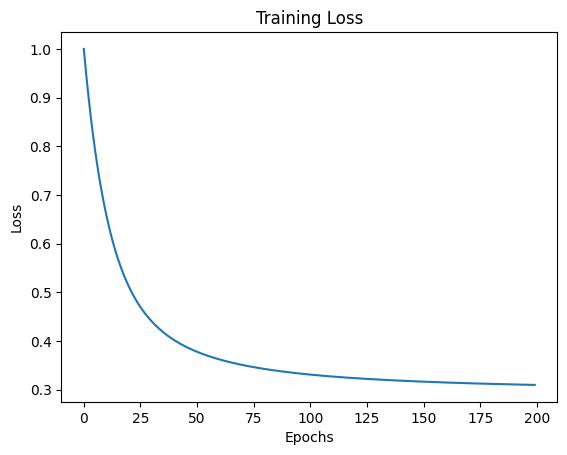

In [ ]:
test_loss = loss(y(x_array_norm,a,b),labels)
print(a,b)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(range(epochs),train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()